In [2]:
import os
import pandas as pd
import numpy as np
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

Folders = os.listdir('./HandLabeledData')

SDContainer = {
    'DoubleRhythmic': [[], []],
    'RhythmicAndRandom': [],
    'SingleRhythmic': []
}

for Folder in Folders:
    FolderPath = os.path.join('./HandLabeledData', Folder)
    FilePaths = os.listdir(FolderPath)
    for File in FilePaths:
        FullFilePath = os.path.join(FolderPath,File)
        RunDF = pd.read_csv(FullFilePath)
        if Folder == 'DoubleRhythmic':
            RhythmOne = RunDF[RunDF['Rhythm'] == 'Rhythm 1']['Value']
            RhythmTwo = RunDF[RunDF['Rhythm'] == 'Rhythm 2']['Value']
            
            RhythmOne = np.diff(RhythmOne)
            RhythmTwo = np.diff(RhythmTwo)
            
            RhythmOneSD = np.std(RhythmOne)
            RhythmTwoSD = np.std(RhythmTwo)
            if RhythmOneSD  < 0 or RhythmTwoSD < 0:
                print("Negative")
            
            SDContainer[Folder][0].append(RhythmOneSD)
            SDContainer[Folder][1].append(RhythmTwoSD)
        else:
            RhythmOne = RunDF[RunDF['Rhythm'] == 'Rhythm 1']['Value']
            
            if RhythmOneSD  < 0 or RhythmTwoSD < 0:
                print("Negative")
                 
            RhythmOneSD = np.std(RhythmOne)
            SDContainer[Folder].append(RhythmOneSD)

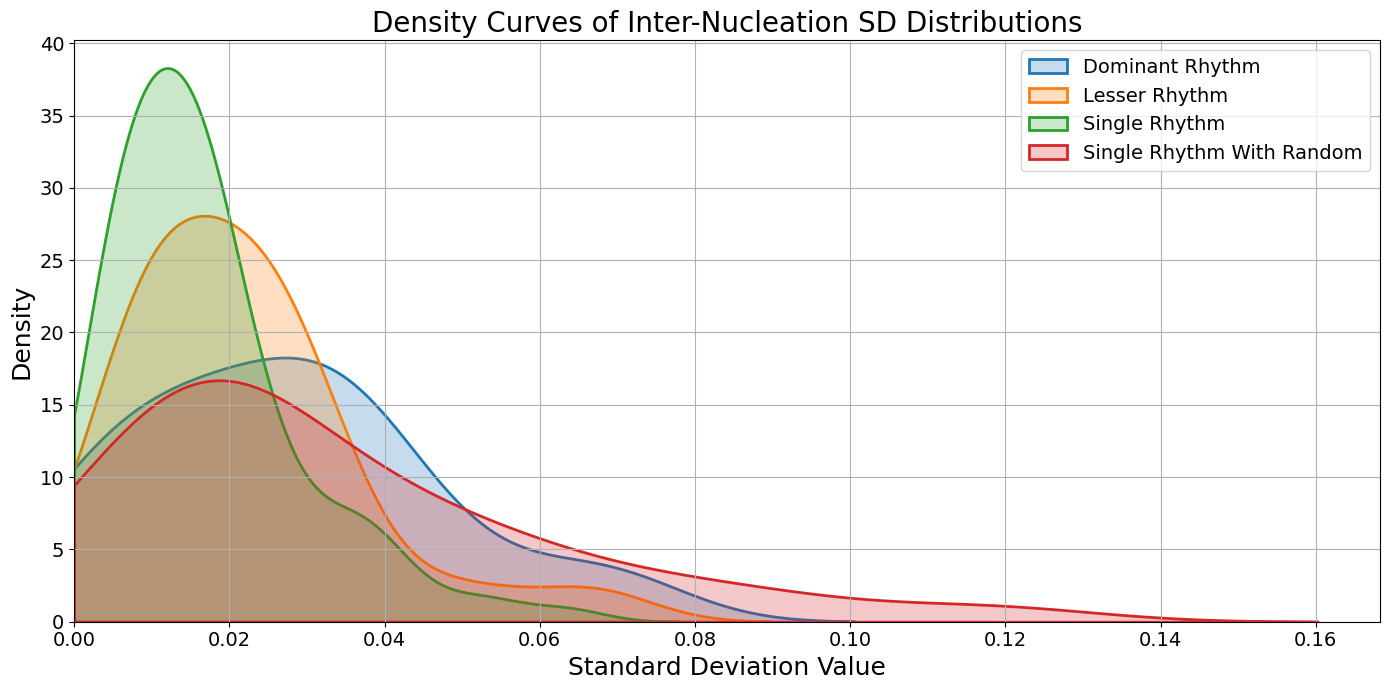

In [7]:
# Extract data
DoubleR1SD = SDContainer['DoubleRhythmic'][0]
DoubleR2SD = SDContainer['DoubleRhythmic'][1]
SingleR1SD = SDContainer['SingleRhythmic']
RhythmicAndRandom = SDContainer['RhythmicAndRandom']

# Convert all to lists and filter to values >= 0
DoubleR1SD = [x for x in DoubleR1SD if x >= 0]
DoubleR2SD = [x for x in DoubleR2SD if x >= 0]
SingleR1SD = [x for x in SingleR1SD if x >= 0]
RhythmicAndRandom = [x for x in RhythmicAndRandom if x >= 0]

# Plot KDE
plt.figure(figsize=(14, 7))

sns.kdeplot(DoubleR1SD, label='Dominant Rhythm', linewidth=2, fill=True, clip=(0, None))
sns.kdeplot(DoubleR2SD, label='Lesser Rhythm', linewidth=2, fill=True, clip=(0, None))
sns.kdeplot(SingleR1SD, label='Single Rhythm', linewidth=2, fill=True, clip=(0, None))
sns.kdeplot(RhythmicAndRandom, label='Single Rhythm With Random', linewidth=2, fill=True, clip=(0, None))

plt.title("Density Curves of Inter-Nucleation SD Distributions", fontsize=20)
plt.xlabel("Standard Deviation Value", fontsize=18)
plt.ylabel("Density", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(bottom=0)
plt.xlim(left=0)  # Ensure x-axis doesn't show negative values
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
shapiro_results = {
    "DoubleR1SD": shapiro(DoubleR1SD),
    "DoubleR2SD": shapiro(DoubleR2SD),
    "SingleR1SD": shapiro(SingleR1SD),
    "RhythmicAndRandom": shapiro(RhythmicAndRandom)
}

levene_results = {
    "DoubleR1SD vs DoubleR2SD": levene(DoubleR1SD, DoubleR2SD),
    "DoubleR1SD vs SingleR1SD": levene(DoubleR1SD, SingleR1SD),
    "DoubleR1SD vs RhythmicAndRandom": levene(DoubleR1SD, RhythmicAndRandom)
}

ttest_results = {
    "DoubleR1SD vs DoubleR2SD": ttest_ind(DoubleR1SD, DoubleR2SD, equal_var=True),
    "DoubleR1SD vs SingleR1SD": ttest_ind(DoubleR1SD, SingleR1SD, equal_var=False)
}

mannwhitney_results = {
    "SingleR1SD vs DoubleR1SD": mannwhitneyu(SingleR1SD, DoubleR1SD, alternative='less'),
    "SingleR1SD vs RhythmicAndRandom": mannwhitneyu(SingleR1SD, RhythmicAndRandom, alternative='less'),
    "SingleR1SD vs DoubleR2SD": mannwhitneyu(SingleR1SD, DoubleR2SD, alternative='less'),
    "DoubleR2SD vs DoubleR1SD": mannwhitneyu(DoubleR2SD, DoubleR1SD, alternative='less'),
    "DoubleR2SD vs RhythmicAndRandom": mannwhitneyu(DoubleR2SD, RhythmicAndRandom, alternative='less')
}

shapiro_results, levene_results, ttest_results, mannwhitney_results

({'DoubleR1SD': ShapiroResult(statistic=np.float64(0.9453987675495248), pvalue=np.float64(0.2149251635218758)),
  'DoubleR2SD': ShapiroResult(statistic=np.float64(0.8706924673287741), pvalue=np.float64(0.005427730467078014)),
  'SingleR1SD': ShapiroResult(statistic=np.float64(0.88706642392816), pvalue=np.float64(4.08081088615157e-07)),
  'RhythmicAndRandom': ShapiroResult(statistic=np.float64(0.8511578847194877), pvalue=np.float64(0.0009865741860003007))},
 {'DoubleR1SD vs DoubleR2SD': LeveneResult(statistic=np.float64(2.485273475935225), pvalue=np.float64(0.12176957393551464)),
  'DoubleR1SD vs SingleR1SD': LeveneResult(statistic=np.float64(9.844822215236219), pvalue=np.float64(0.0021392710930636513)),
  'DoubleR1SD vs RhythmicAndRandom': LeveneResult(statistic=np.float64(0.8661027049295205), pvalue=np.float64(0.3565083067440412))},
 {'DoubleR1SD vs DoubleR2SD': TtestResult(statistic=np.float64(1.0491455368224685), pvalue=np.float64(0.29959217809792993), df=np.float64(46.0)),
  'Doubl

C:\Users\Andrew\AppData\Local\Temp\ipykernel_9040\2684895881.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_violin, x="Group", y="SD Value", inner="box", palette="muted")


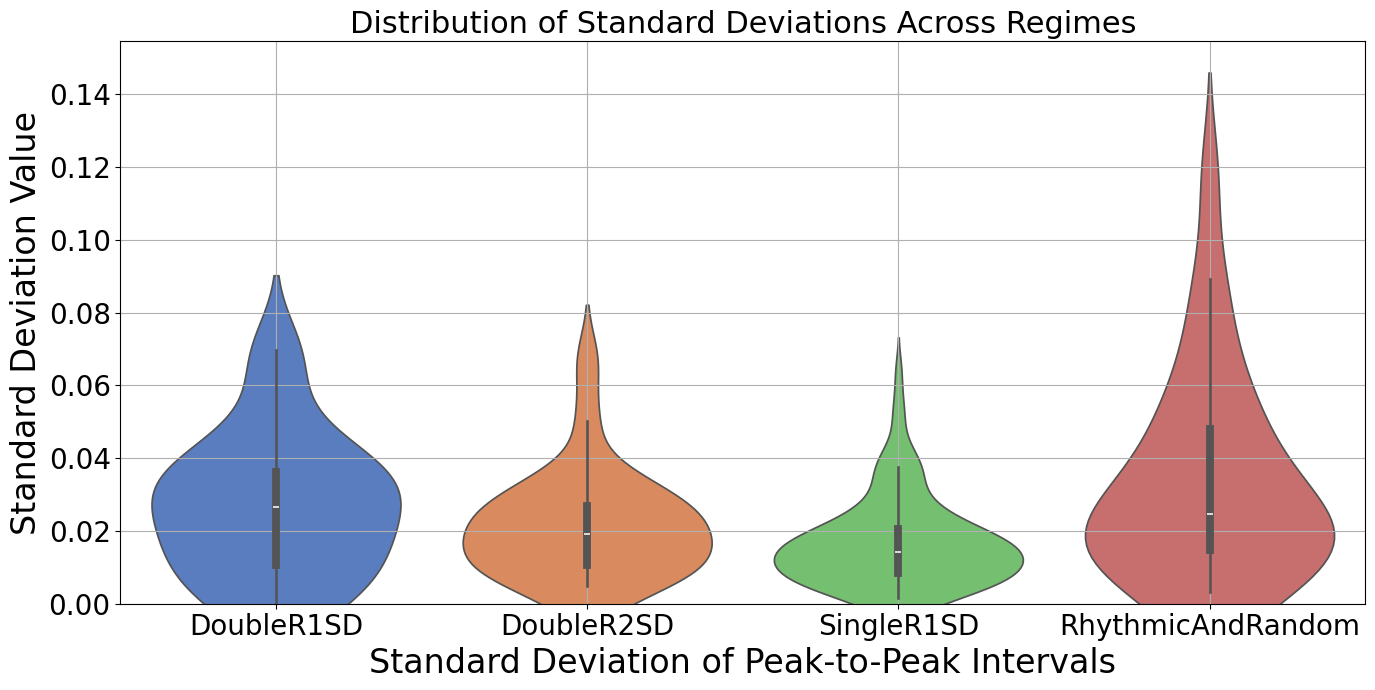

In [9]:
df_violin = pd.DataFrame({
    "SD Value": DoubleR1SD + DoubleR2SD + SingleR1SD + RhythmicAndRandom,
    "Group": (["DoubleR1SD"] * len(DoubleR1SD)) +
             (["DoubleR2SD"] * len(DoubleR2SD)) +
             (["SingleR1SD"] * len(SingleR1SD)) +
             (["RhythmicAndRandom"] * len(RhythmicAndRandom))
})

# Plot
plt.figure(figsize=(14, 7))
sns.violinplot(data=df_violin, x="Group", y="SD Value", inner="box", palette="muted")

plt.title("Distribution of Standard Deviations Across Regimes", fontsize=22)
plt.xlabel("Standard Deviation of Peak-to-Peak Intervals", fontsize=24)
plt.ylabel("Standard Deviation Value", fontsize=24)
plt.tick_params(axis='both', labelsize=20)

# Force y-axis to start at 0
plt.ylim(bottom=0)

plt.grid(True)
plt.tight_layout()
plt.show()